In [1]:
import numba as nb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 10
N = L*L

temperatura = 1

In [3]:
@nb.njit
def cria_inicial(L):
    N = L*L
    x = np.zeros(N, dtype=np.int32)
    y = np.zeros(N, dtype=np.int32)
    spins = np.zeros(N, dtype=np.int8)
    
    count = 0
    for j in range(L):                  # 12 13 14 15
        for i in range(L):              # 8  9  10 11
            x[count] = i                # 4  5  6  7
            y[count] = j                # 0  1  2  3
            a = np.random.randint(2)
            if a:
                spins[count] = 1
            else:
                spins[count] = -1
            count += 1
            
    return x, y, spins

In [4]:
@nb.njit
def cria_inicial_1(L):
    N = L*L
    x = np.zeros(N, dtype=np.int32)
    y = np.zeros(N, dtype=np.int32)
    spins = np.zeros(N, dtype=np.int8)
    
    count = 0
    for j in range(L):                  # 12 13 14 15
        for i in range(L):              # 8  9  10 11
            x[count] = i                # 4  5  6  7
            y[count] = j                # 0  1  2  3
            spins[count] = 1
            count += 1
            
    return x, y, spins

In [5]:
@nb.njit
def cria_inicial_xadrez(L):
    N = L*L
    x = np.zeros(N, dtype=np.int32)
    y = np.zeros(N, dtype=np.int32)
    spins = np.zeros(N, dtype=np.int8)
    
    count = 0
    for j in range(L):                  # 12 13 14 15
        for i in range(L):              # 8  9  10 11
            x[count] = i                # 4  5  6  7
            y[count] = j                # 0  1  2  3
            if (i+j)%2:
                spins[count] = 1
            else:
                spins[count] = -1
            count += 1
            
    return x, y, spins

In [6]:
@nb.njit
def vizinhos(N):
    L = int(np.sqrt(N))
    viz = np.zeros((N,4), dtype=np.int32)
    
    for i in range(N):
        if (i+1)%L == 0:
            viz[i][0] = i+1-L
        else:
            viz[i][0] = i+1
            
        viz[i][1] = (i+L)%N
        
        if i%L == 0:
            viz[i][2] = i-1+L
        else:
            viz[i][2] = i-1
        
        viz[i][3] = (i-L)%N
    
    return viz

In [7]:
@nb.njit
def energia(spins, viz):
    N = len(spins)
    E = 0
    
    for i in range(N):
        h = spins[int(viz[i,0])] + spins[int(viz[i,1])]
        E -= spins[i] * h
    
    mag = np.sum(spins)
    return E, mag

In [8]:
@nb.njit
def expos(beta):
    ex = np.zeros(5,dtype=np.float32)
    ex[0]=np.exp(8.0*beta)
    ex[1]=np.exp(4.0*beta)
    ex[2]=1.0
    ex[3]=np.exp(-4.0*beta)
    ex[4]=np.exp(-8.0*beta)
    return ex

In [9]:
@nb.njit
def monte_carlo_passo(spins, viz, exp, ener, mag):
    N = len(spins)
    
    for i in range(N):
        h = spins[viz[i,0]]+spins[viz[i,1]]+spins[viz[i,2]]+spins[viz[i,3]] # soma dos vizinhos
        dif = int(spins[i]*h*0.5+2)
        
        if np.random.random() < exp[dif]:
            spins[i] = -spins[i]
            ener += dif*4 - 8
            mag += 2*spins[i]
            
    return spins, ener, mag

-200 100


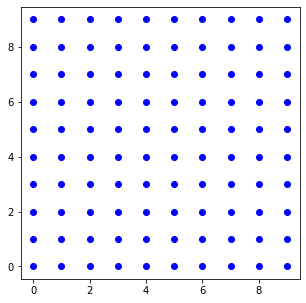

In [11]:
L = 10
N = L*L
temperatura = 1
beta = 1/temperatura

x, y, spins = cria_inicial_1(L)
viz = vizinhos(N)
ener, mag = energia(spins,viz)
print(ener, mag)
exp = expos(beta)
plt.figure(figsize=(5,5))
for i in range(N):
    if spins[i] == 1:
        plt.scatter(x[i],y[i],color='b')
    else: 
        plt.scatter(x[i],y[i],color='r')
plt.show()

In [17]:
spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
print(ener, mag)
plt.figure(figsize=(5,5))
"""for i in range(N):
    if spins[i] == 1:
        plt.scatter(x[i],y[i],color='b')
    else: 
        plt.scatter(x[i],y[i],color='r')
plt.show()"""

-200 100


"for i in range(N):\n    if spins[i] == 1:\n        plt.scatter(x[i],y[i],color='b')\n    else: \n        plt.scatter(x[i],y[i],color='r')\nplt.show()"

<Figure size 360x360 with 0 Axes>

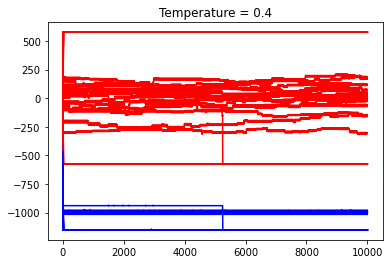

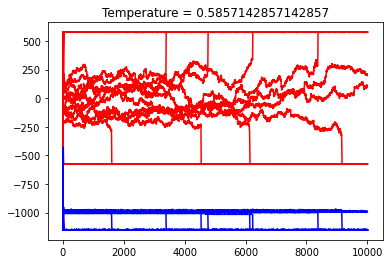

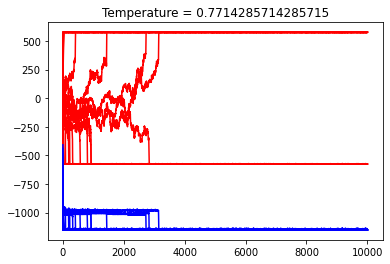

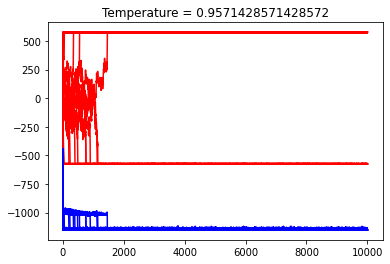

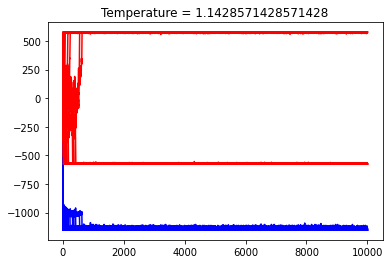

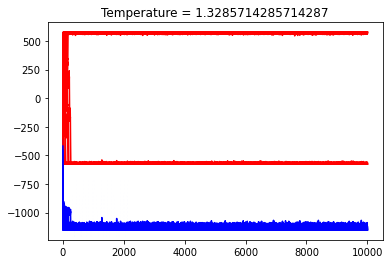

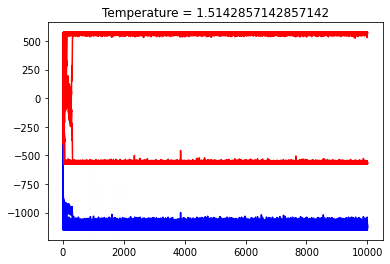

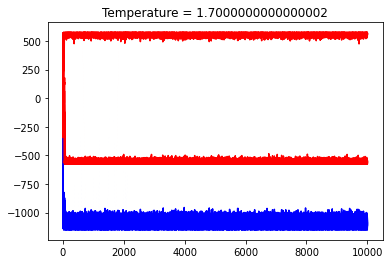

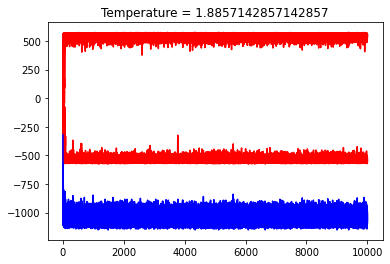

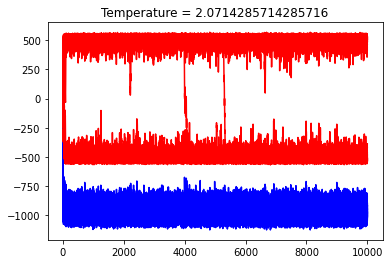

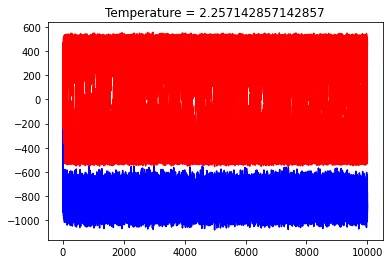

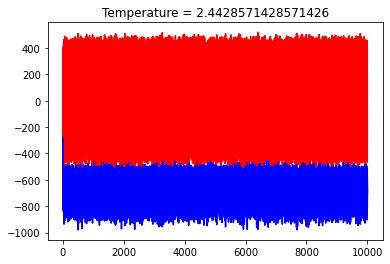

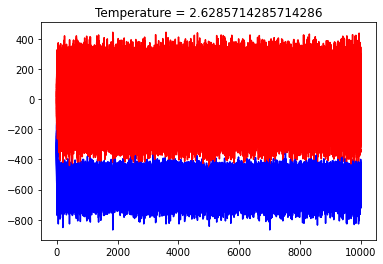

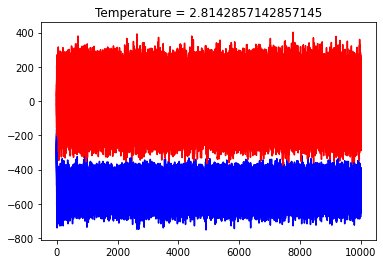

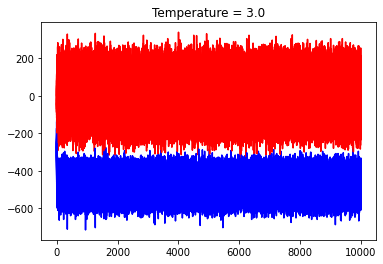

In [23]:
L = 24
N = L*L

temps = np.linspace(0.4, 3, 15, endpoint=True)

for temperatura in temps:
    beta = 1/temperatura
    
    plt.figure(figsize=(6,4))
    plt.title("Temperature = " + str(temperatura))
    
    for a in range(50):
        x, y, spins = cria_inicial(L)
        viz = vizinhos(N)
        ener, mag = energia(spins,viz)
        exp = expos(beta)

        passos = 10000

        listaenergia = np.zeros(passos)
        listaenergia[0] = ener
        listamag = np.zeros(passos)
        listamag[0] = mag

        for a in range(passos):
            spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
            listaenergia[a] = ener
            listamag[a] = mag
            
        plt.plot(listaenergia,color='b')
        plt.plot(listamag,color='r')
        
    plt.show()

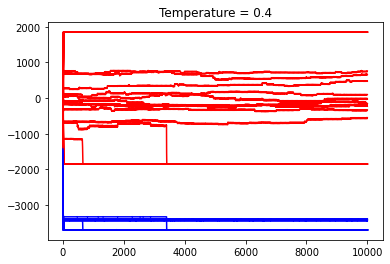

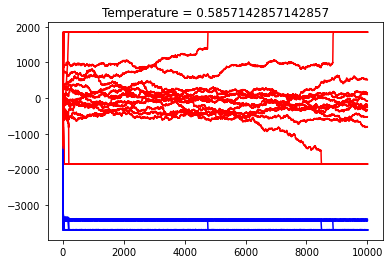

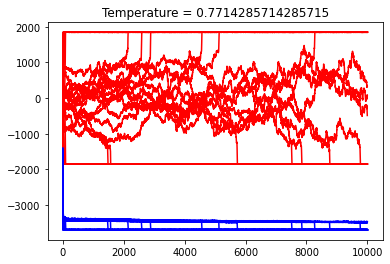

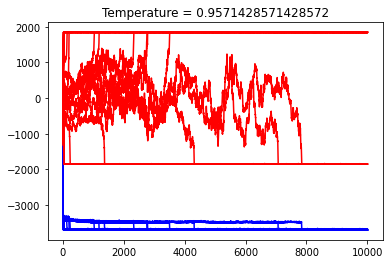

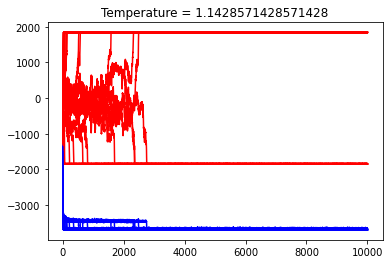

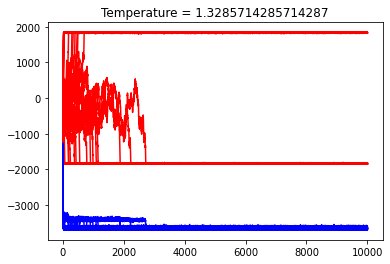

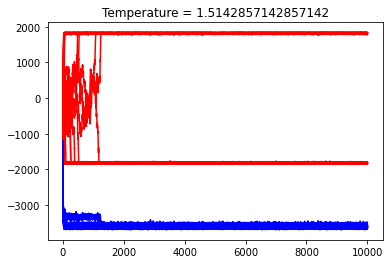

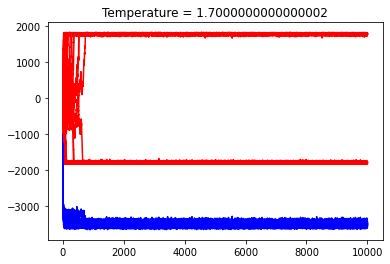

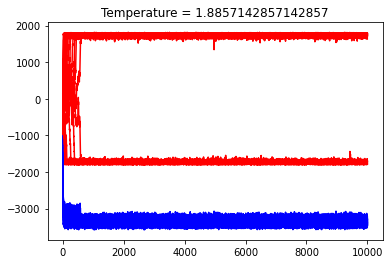

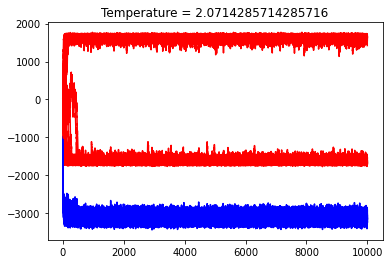

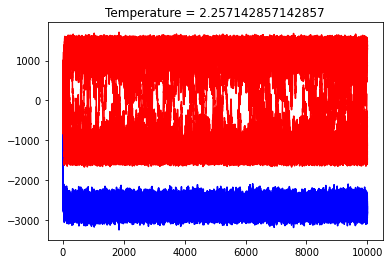

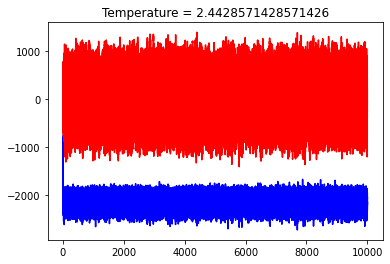

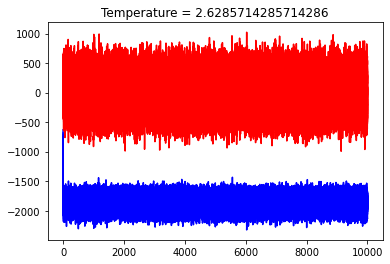

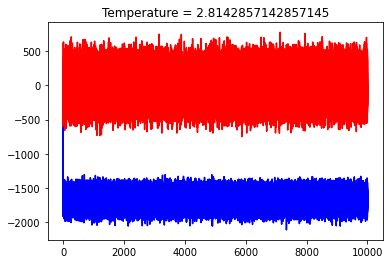

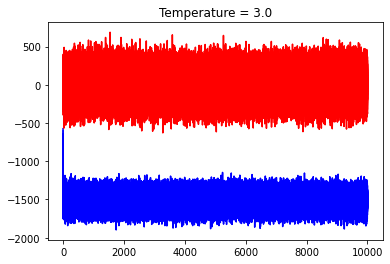

In [24]:
L = 43
N = L*L

temps = np.linspace(0.4, 3, 15, endpoint=True)

for temperatura in temps:
    beta = 1/temperatura
    
    plt.figure(figsize=(6,4))
    plt.title("Temperature = " + str(temperatura))
    
    for a in range(50):
        x, y, spins = cria_inicial(L)
        viz = vizinhos(N)
        ener, mag = energia(spins,viz)
        exp = expos(beta)

        passos = 10000

        listaenergia = np.zeros(passos)
        listaenergia[0] = ener
        listamag = np.zeros(passos)
        listamag[0] = mag

        for a in range(passos):
            spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
            listaenergia[a] = ener
            listamag[a] = mag
            
        plt.plot(listaenergia,color='b')
        plt.plot(listamag,color='r')
        
    plt.show()

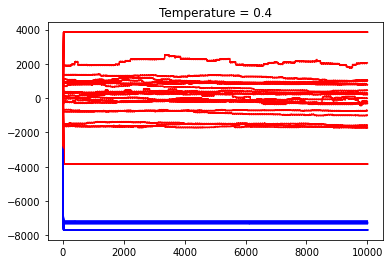

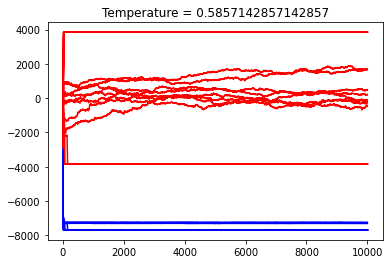

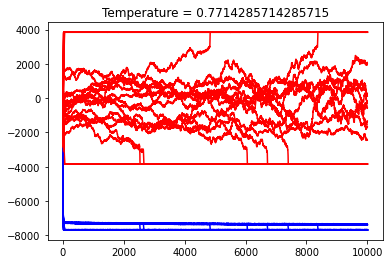

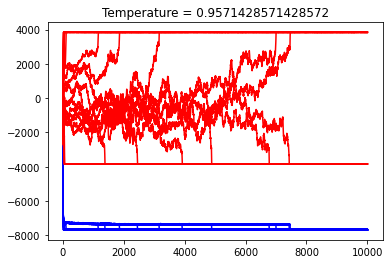

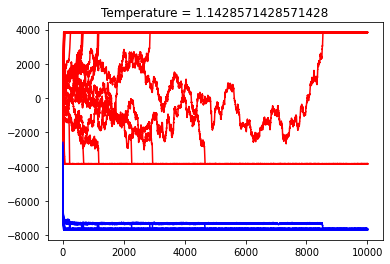

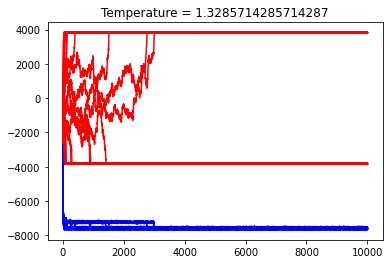

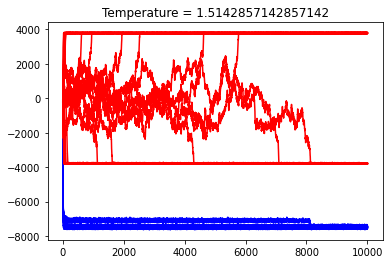

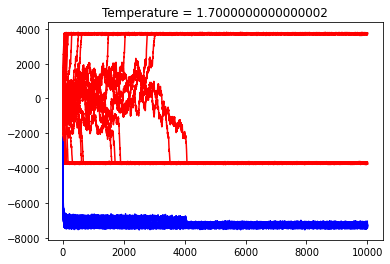

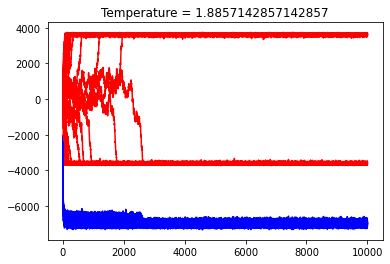

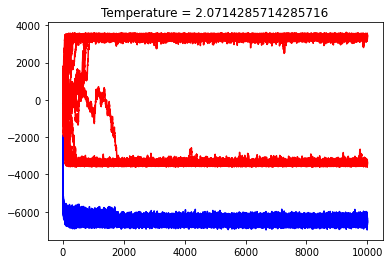

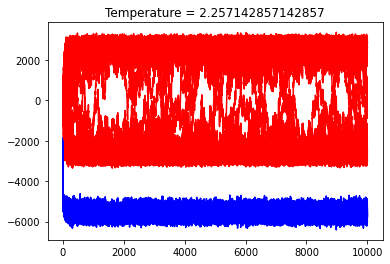

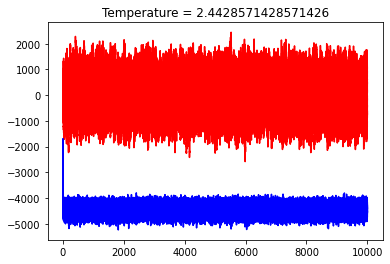

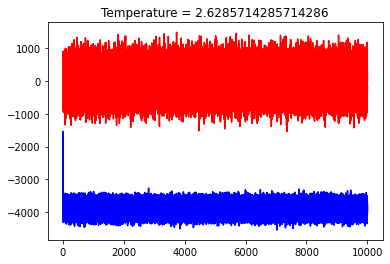

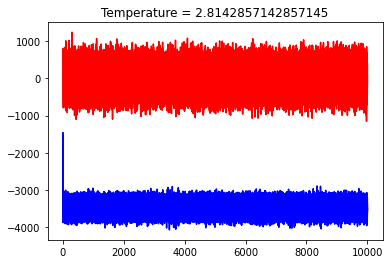

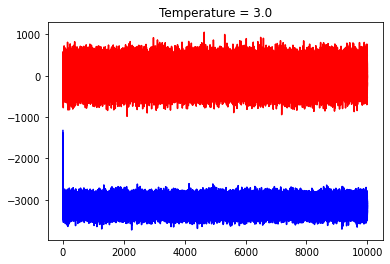

In [25]:
L = 62
N = L*L

temps = np.linspace(0.4, 3, 15, endpoint=True)

for temperatura in temps:
    beta = 1/temperatura
    
    plt.figure(figsize=(6,4))
    plt.title("Temperature = " + str(temperatura))
    
    for a in range(50):
        x, y, spins = cria_inicial(L)
        viz = vizinhos(N)
        ener, mag = energia(spins,viz)
        exp = expos(beta)

        passos = 10000

        listaenergia = np.zeros(passos)
        listaenergia[0] = ener
        listamag = np.zeros(passos)
        listamag[0] = mag

        for a in range(passos):
            spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
            listaenergia[a] = ener
            listamag[a] = mag
            
        plt.plot(listaenergia,color='b')
        plt.plot(listamag,color='r')
        
    plt.show()

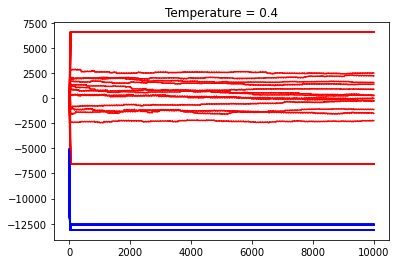

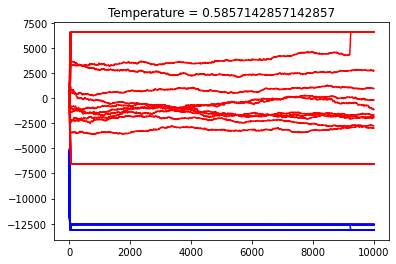

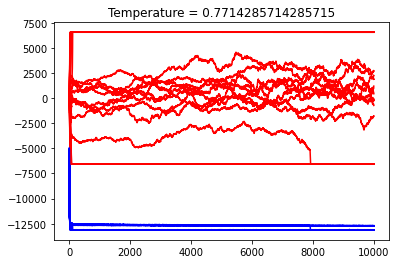

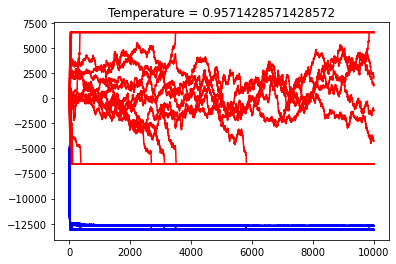

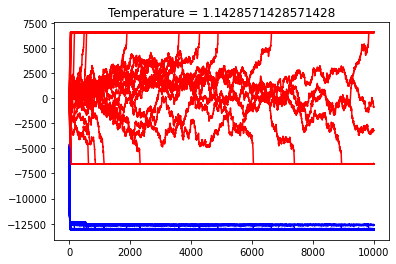

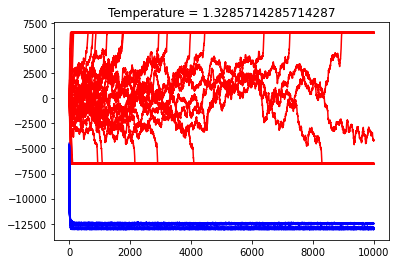

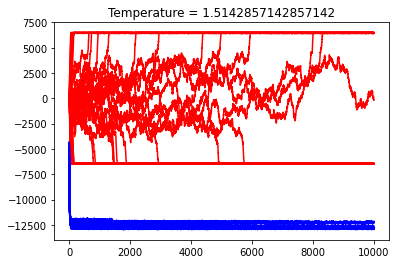

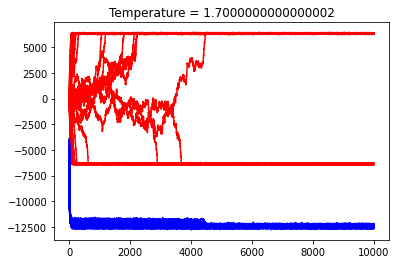

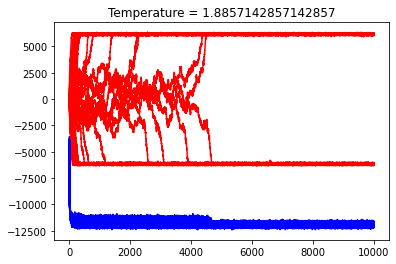

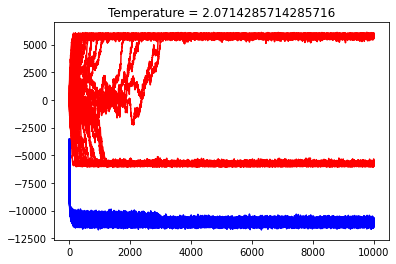

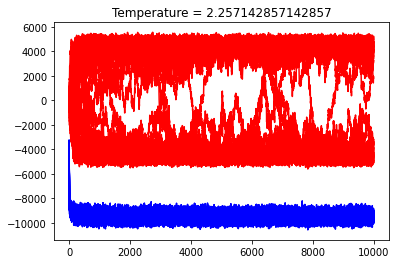

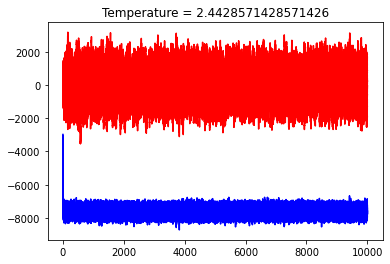

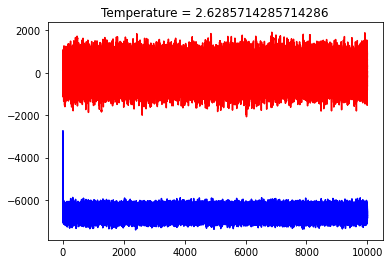

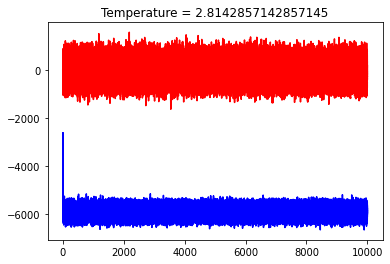

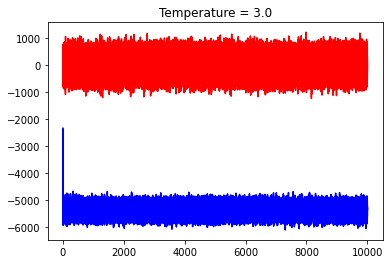

In [26]:
L = 81
N = L*L

temps = np.linspace(0.4, 3, 15, endpoint=True)

for temperatura in temps:
    beta = 1/temperatura
    
    plt.figure(figsize=(6,4))
    plt.title("Temperature = " + str(temperatura))
    
    for a in range(50):
        x, y, spins = cria_inicial(L)
        viz = vizinhos(N)
        ener, mag = energia(spins,viz)
        exp = expos(beta)

        passos = 10000

        listaenergia = np.zeros(passos)
        listaenergia[0] = ener
        listamag = np.zeros(passos)
        listamag[0] = mag

        for a in range(passos):
            spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
            listaenergia[a] = ener
            listamag[a] = mag
            
        plt.plot(listaenergia,color='b')
        plt.plot(listamag,color='r')
        
    plt.show()

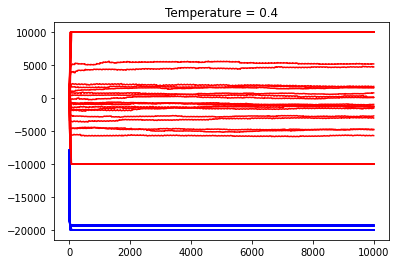

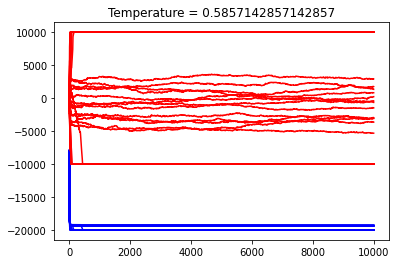

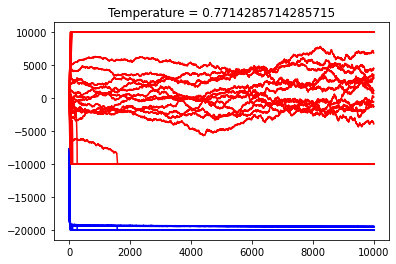

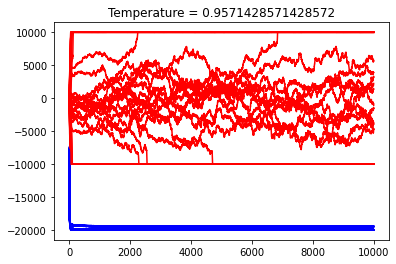

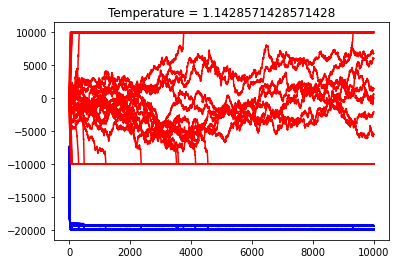

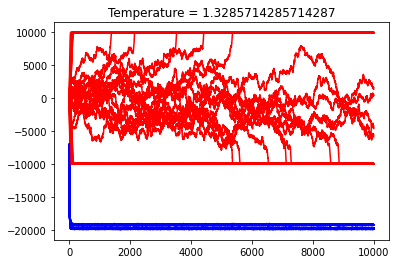

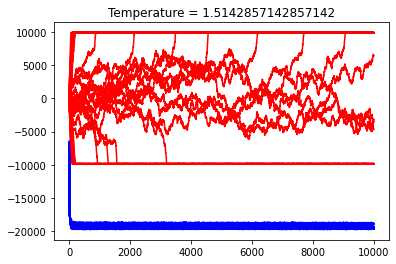

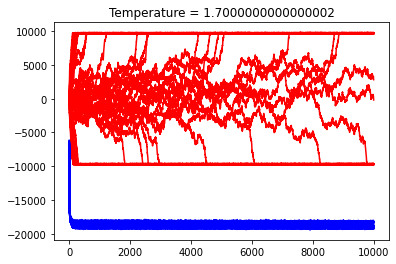

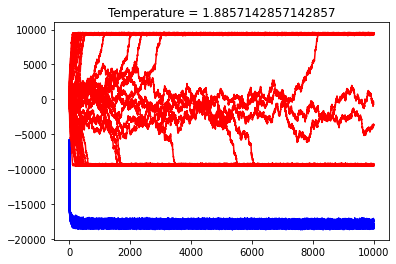

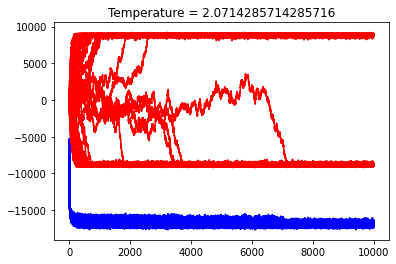

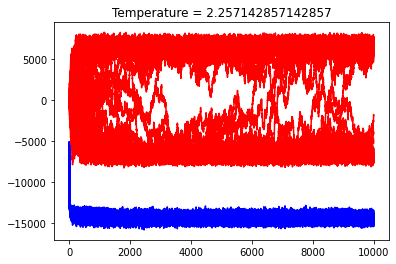

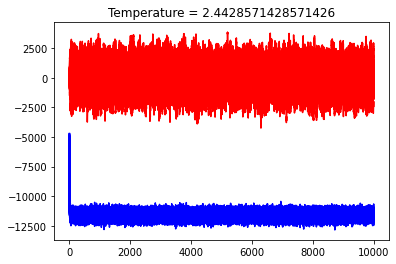

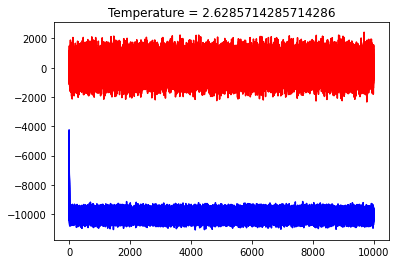

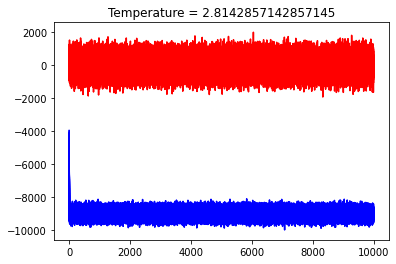

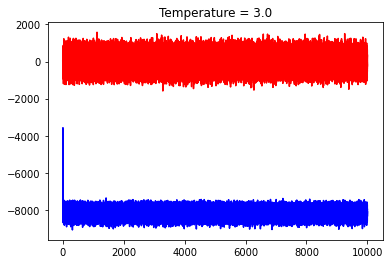

In [27]:
L = 100
N = L*L

temps = np.linspace(0.4, 3, 15, endpoint=True)

for temperatura in temps:
    beta = 1/temperatura
    
    plt.figure(figsize=(6,4))
    plt.title("Temperature = " + str(temperatura))
    
    for a in range(50):
        x, y, spins = cria_inicial(L)
        viz = vizinhos(N)
        ener, mag = energia(spins,viz)
        exp = expos(beta)

        passos = 10000

        listaenergia = np.zeros(passos)
        listaenergia[0] = ener
        listamag = np.zeros(passos)
        listamag[0] = mag

        for a in range(passos):
            spins, ener, mag = monte_carlo_passo(spins, viz, exp, ener, mag)
            listaenergia[a] = ener
            listamag[a] = mag
            
        plt.plot(listaenergia,color='b')
        plt.plot(listamag,color='r')
        
    plt.show()